In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from ipywidgets import interact

# Metallic waveguide

In [62]:
d = 5

eps = lambda w: 3
ky = lambda m: m * np.pi / d
kz = lambda m, w: np.sqrt(w**2 * eps(w) - ky(m)**2)

y = np.linspace(-2*d/2, 2*d/2, 50).reshape(-1, 1)
z = np.linspace(0, 5*d, 100).reshape(1, -1)

def u(m):
    if m % 2 == 0:
        return np.sin(ky(m) * y) * (np.abs(y) < d/2)
    return np.cos(ky(m) * y) * (np.abs(y) < d/2)

def E_p(m, w, t=0, phi=0):
    return u(m) * np.cos(kz(m, w) * z - w * t + phi)

def E_m(m, w, t=0, phi=0):
    return u(m) * np.cos(-kz(m, w) * z - w * t + phi)



## Single-mode function

Text(0, 0.5, '$y$')

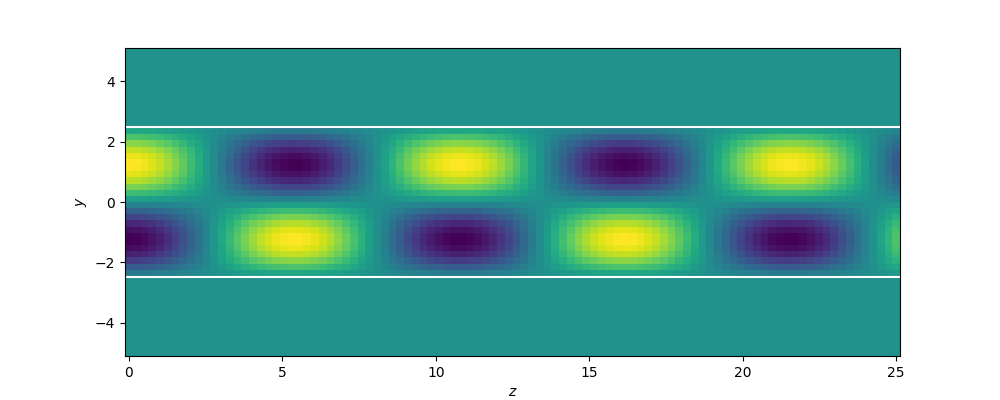

In [68]:
fig = plt.figure(figsize=(10, 4))

plt.pcolormesh(z, y, E_p(m=2, w=4/d))
plt.axhline(y=d/2, c="w")
plt.axhline(y=-d/2, c="w")
plt.xlabel("$z$")
plt.ylabel("$y$")

(0.0, 3.0)

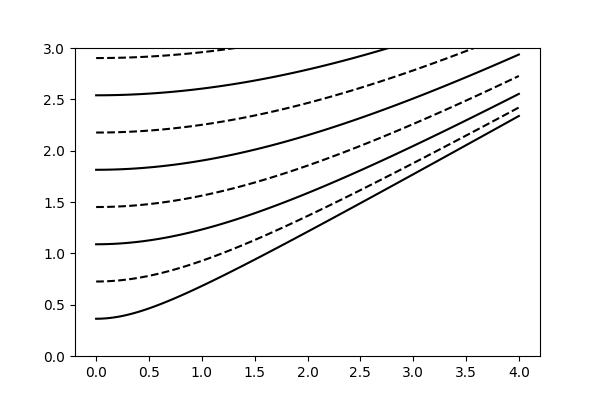

In [92]:
kp = np.linspace(0, 20/d, 100)
w = lambda m: 1 / np.sqrt(eps(0)) * np.sqrt(kp**2 + (m * np.pi / d)**2)

fig = plt.figure(figsize=(6, 4))

for m in range(1, 9):
    plt.plot(kp, w(m), ls="--"*(1-m%2)+"-"*(m%2), c="k")
plt.ylim(0, 3)

## Single-mode propagation

interactive(children=(FloatSlider(value=0.0, description='t', max=15.0, step=0.01), Output()), _dom_classes=('…

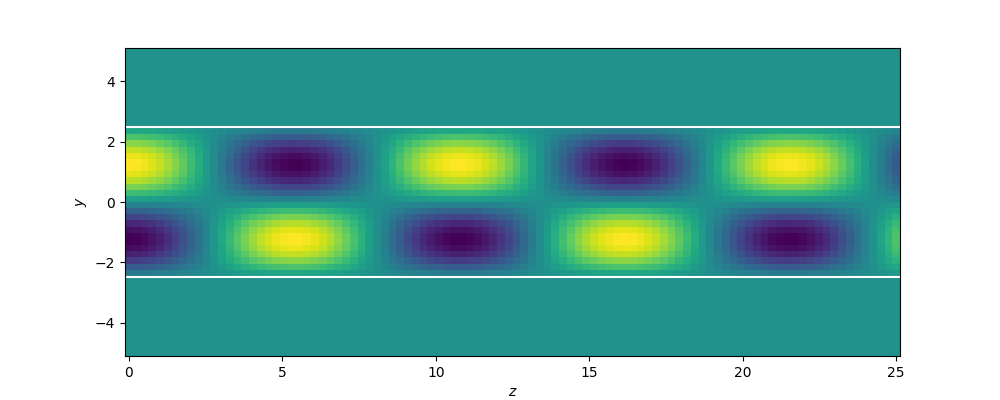

In [69]:
fig, ax = plt.subplots(1, figsize=(10, 4))
mesh_1mode = ax.pcolormesh(z, y, E_p(m=2, w=4/d))
ax.axhline(y=d/2, c="w")
ax.axhline(y=-d/2, c="w")
ax.set_xlabel("$z$")
ax.set_ylabel("$y$")

@interact(t=(0, 3*d, 0.01))
def time_evol(t=0):
    mesh_1mode.set_array(E_p(m=2, w=4/d, t=t).ravel())
    plt.draw()

## Multi-mode propagation

interactive(children=(FloatSlider(value=0.0, description='t', max=15.0, step=0.01), Output()), _dom_classes=('…

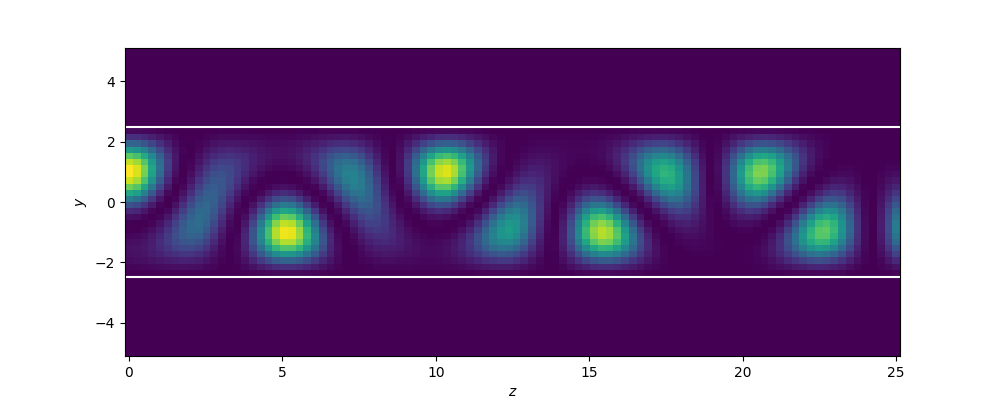

In [70]:
m1, m2 = 1, 2
w = 4/d

fig, ax = plt.subplots(1, figsize=(10, 4))
mesh_2modes = ax.pcolormesh(z, y, np.abs(E_p(m1, w, 0) + E_p(m2, w, 0))**2, 
                           alpha=1)
ax.axhline(y=d/2, c="w")
ax.axhline(y=-d/2, c="w")
ax.set_xlabel("$z$")
ax.set_ylabel("$y$")

@interact(t=(0, 3*d, 0.01))
def time_evol(t=0):
    mesh_2modes.set_array(np.abs(E_p(m1, w, t) + E_p(m2, w, t)).ravel()**2)
    plt.draw()

interactive(children=(FloatSlider(value=0.0, description='t', max=25.0, step=0.01), Output()), _dom_classes=('…

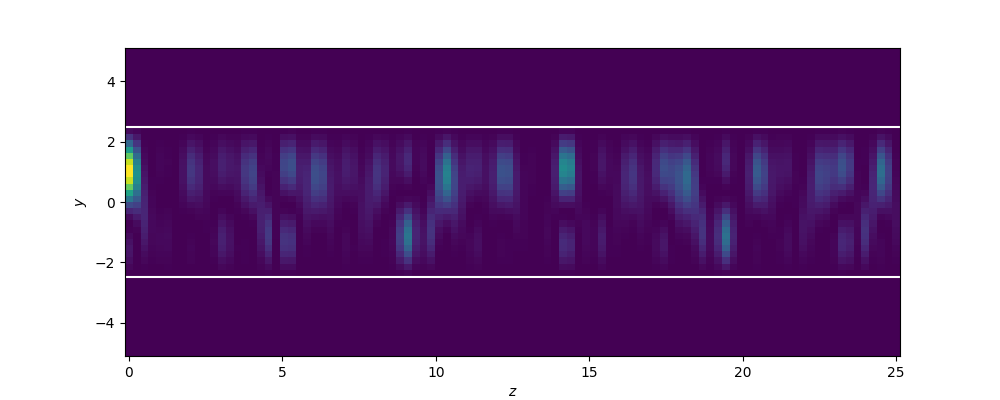

In [73]:
fig, ax = plt.subplots(1, figsize=(10, 4))

c = np.random.rand(M:=3, W:=5)

E_rand = lambda t: sum(c[m, iw] * E_p(m, w, t) for m in range(1, M) 
                       for iw, w in enumerate(np.linspace(m*np.pi/d/np.sqrt(eps(0)), 5 * m * np.pi/d/np.sqrt(eps(0)), W)))

mesh_multi = ax.pcolormesh(z, y, np.abs(E_rand(0))**2, alpha=1)
ax.set_xlabel("$z$")
ax.set_ylabel("$y$")
ax.axhline(y=d/2, c="w")
ax.axhline(y=-d/2, c="w")

@interact(t=(0, 5*d, 0.01))
def time_evol(t=0):
    mesh_multi.set_array(np.abs((E_rand(t)).ravel())**2)
    plt.draw()

# Dielectric waveguide

In [74]:
n1, n2, d = 2, 1, 5

C:\Users\10921\AppData\Local\Temp\ipykernel_27488\3761808681.py:4: RuntimeWarning: divide by zero encountered in divide
  f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\3761808681.py:4: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)


interactive(children=(FloatSlider(value=3.1, description='w', max=9.0, min=0.01, step=0.01), Output()), _dom_c…

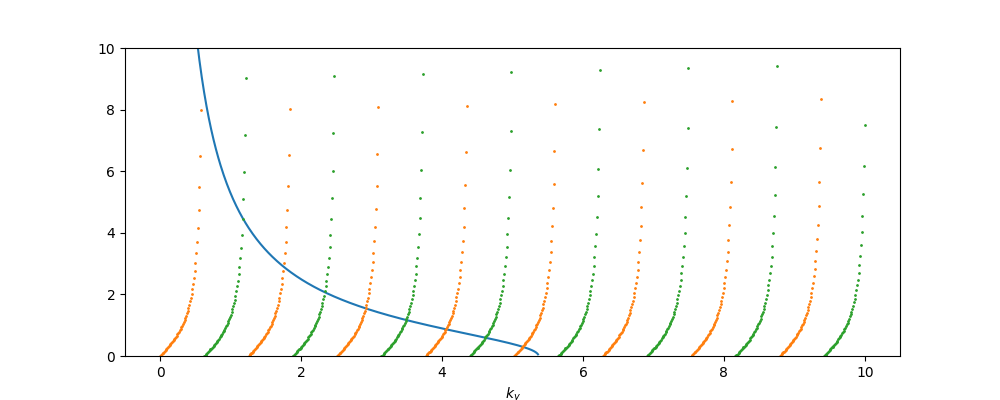

In [77]:

m = 2
ky = np.linspace(0, 10, 900)

f1 = lambda w: np.sqrt((w / ky)**2 * (n1**2 - n2**2) - 1)
f2_even = np.tan(ky * d / 2)
f2_odd = np.tan(ky * d / 2 + np.pi / 2)

fig, ax = plt.subplots(1, figsize=(10, 4))
ax.set_ylim(0, 10)
line1, = ax.plot(ky, f1(3.1))
ax.plot(ky, f2_even, marker="o", ms=1, lw=0)
ax.plot(ky, f2_odd, marker="o", ms=1, lw=0)
ax.set_xlabel("$k_y$")

@interact(w=(0.01, 9, 0.01))
def time_evol(w=3.1):
    line1.set_ydata(f1(w))


C:\Users\10921\AppData\Local\Temp\ipykernel_27488\577119811.py:2: RuntimeWarning: invalid value encountered in sqrt
  ky = lambda w: np.sqrt(w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\577119811.py:4: RuntimeWarning: invalid value encountered in sqrt
  f1 = lambda w: np.sqrt((w / ky(w))**2 * (n1**2 - n2**2) - 1)


interactive(children=(FloatSlider(value=4.0, description='w', max=9.0, min=0.01, step=0.01), Output()), _dom_c…

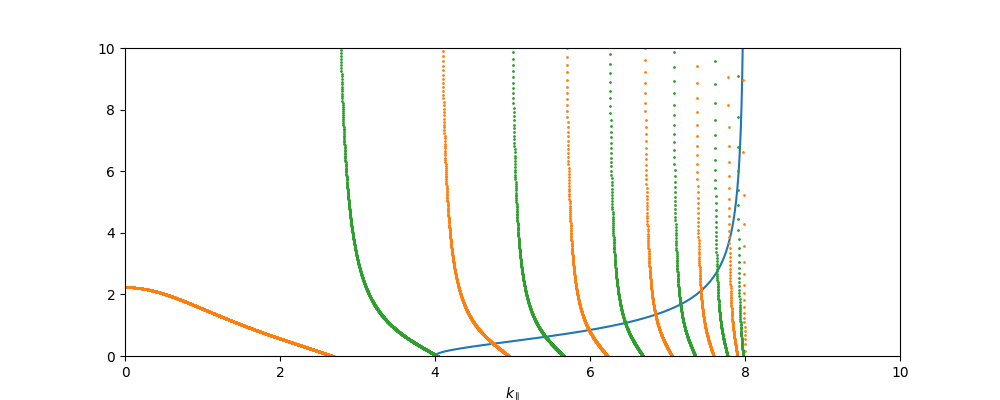

In [80]:
kp = np.linspace(0, 10, 9000)
ky = lambda w: np.sqrt(w**2 * n1**2 - kp**2)

f1 = lambda w: np.sqrt((w / ky(w))**2 * (n1**2 - n2**2) - 1)
f2_even = lambda w: np.tan(ky(w) * d / 2)
f2_odd = lambda w: np.tan(ky(w) * d / 2 + np.pi / 2)

fig, ax = plt.subplots(1, figsize=(10, 4))
line1, = ax.plot(kp, f1(3.1))
line2, = ax.plot(kp, f2_even(3.1), marker="o", ms=1, lw=0)
line3, = ax.plot(kp, f2_odd(3.1), marker="o", ms=1, lw=0)
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)
ax.set_xlabel("$k_\\parallel$")

@interact(w=(0.01, 9, 0.01))
def time_evol(w=4):
    line1.set_ydata(f1(w))
    line2.set_ydata(f2_even(w))
    line3.set_ydata(f2_odd(w))

C:\Users\10921\AppData\Local\Temp\ipykernel_27488\766335618.py:2: RuntimeWarning: invalid value encountered in sqrt
  return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\766335618.py:2: RuntimeWarning: divide by zero encountered in divide
  return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\766335618.py:2: RuntimeWarning: invalid value encountered in divide
  return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\766335618.py:3: RuntimeWarning: invalid value encountered in sqrt
  - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2))
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\766335618.py:4: RuntimeWarning: invalid value encountered in sqrt
  * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2) > 0) )
C:\Users\10921\AppData\Local\Temp\ipykernel_27488\766335618.py:2: RuntimeWarning: in

Text(0.5, 0, '$k_\\parallel d$')

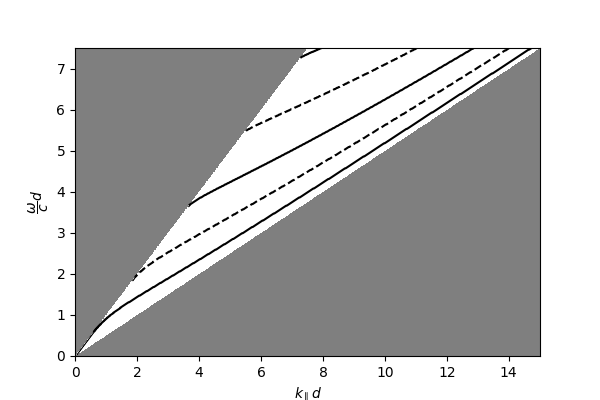

In [81]:
def f_even(w, kp):
    return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
        - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2)) 
        * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 0*np.pi/2) > 0) )

def f_odd(w, kp):
    return ((np.sqrt(kp**2 - w**2 * n2**2) / (w**2 * n1**2 - kp**2)
        - np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 1*np.pi/2)) 
        * (np.tan(np.sqrt(w**2 * n1**2 - kp**2) * d / 2 + 1*np.pi/2) > 0) )

ws = np.linspace(0, 1.5, 750).reshape(-1, 1)
kps = np.linspace(0, 3, 750).reshape(1, -1)

# allowed region
r1 = kps <= ws * n1
r2 = kps >= ws * n2
r = r1 * r2

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.pcolormesh(kps*d, ws*d, 1-r, alpha=0.5, cmap="Grays")
cs_even = ax.contour(kps[0, :]*d, ws[:, 0]*d, f_even(ws, kps) / np.abs(f_even(ws, kps)), [0], 
                     colors="k")
cs_odd = ax.contour(kps[0, :]*d, ws[:, 0]*d, f_odd(ws, kps) / np.abs(f_odd(ws, kps)), [0], 
                    colors="k", linestyles="--")
ax.set_ylabel(r"$\dfrac{\omega}{c}d$")
ax.set_xlabel(r"$k_\parallel d$")

In [94]:
m = lambda ky: np.floor(ky * d / np.pi)

def w(ky):
    return np.sqrt((1 + np.tan(ky * d / 2 + m(ky) * np.pi / 2)**2) * ky**2 / (n1**2 - n2**2))

kappa = lambda ky: ky * np.tan(ky * d / 2 + m(ky) * np.pi / 2)
kz = lambda ky: w(ky)**2 * n1**2 - ky**2

def u(y, ky):
    f1 = np.cos(-ky * d / 2 + m(ky) * np.pi / 2) * np.exp(kappa(ky) * (y + d/2)) * (y < -d/2)
    f2 = np.cos(ky * y + m(ky) * np.pi / 2) * (np.abs(y) <= d/2)
    f3 = np.cos(ky * d / 2 + m(ky) * np.pi / 2) * np.exp(-kappa(ky) * (y - d/2)) * (y > d/2)
    return f1 + f2 + f3

def E_p(ky, t=0, phi=0):
    return u(y, ky) * np.cos(kz(ky) * z - w(ky) * t + phi)

m = 1.0
w = 1.6640036821512747
kz = 9.865633016852001


interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.01), Output()), _dom_classes=('…

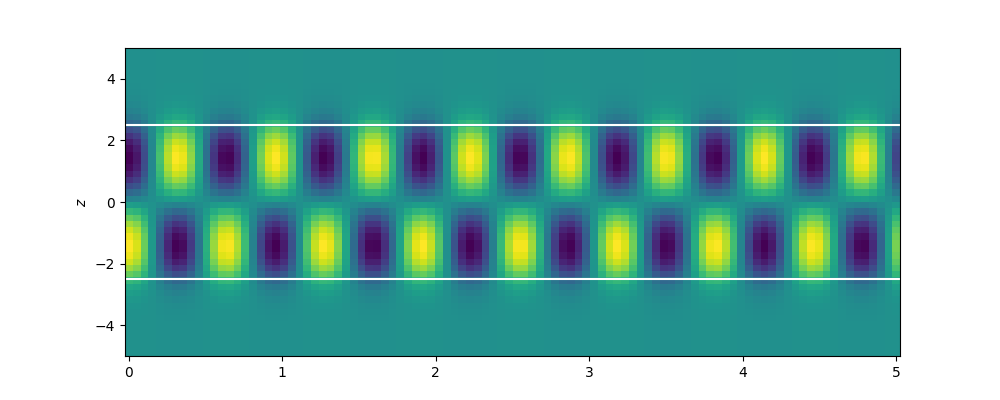

In [95]:
fig, ax = plt.subplots(1, figsize=(10, 4))

ky = 1.1
print("m =", m(ky))
print("w =", w(ky))
print("kz =", kz(ky))

y = np.linspace(-2*d/2, 2*d/2, 50).reshape(-1, 1)
z = np.linspace(0, 5, 100).reshape(1, -1)

mesh_1mode = ax.pcolormesh(z, y, E_p(ky, 0, 0), 
                           alpha=1)
ax.set_ylim(-2*d/2, 2*d/2)
ax.axhline(y=d/2, c="w")
ax.axhline(y=-d/2, c="w")
ax.set_ylabel("$y$")
ax.set_ylabel("$z$")

@interact(t=(0, 10, 0.01))
def time_evol(t=0):
    mesh_1mode.set_array(E_p(ky, t, 0).ravel())
    plt.draw()